In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from scipy import interpolate
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.stats.api as sms
from statsmodels.stats.diagnostic import het_breuschpagan, het_white

In [2]:
df = pd.read_csv('modeling.csv')
df

,agricultural_land%,access_to_electricity%,electric_power_consumption,population_density,individuals_using_internet%,military_expenditure%,government_expenditure_on_education%,GNI,infant,birth_rate,year,country
0,0.476044,1.000000,0.020578,0.007523,0.000000,0.051572,0.077750,0.005738,0.299025,41.068,1960,Albania
1,0.476044,1.000000,0.020578,0.007523,0.000000,0.051572,0.077750,0.005738,0.299025,40.332,1961,Albania
2,0.476044,1.000000,0.020578,0.007759,0.000000,0.051572,0.077750,0.005738,0.299025,39.216,1962,Albania
3,0.476438,1.000000,0.020578,0.007994,0.000000,0.051572,0.077750,0.005738,0.299025,38.149,1963,Albania
4,0.475255,1.000000,0.020578,0.008230,0.000000,0.051572,0.077750,0.005738,0.299025,36.825,1964,Albania
...,...,...,...,...,...,...,...,...,...,...,...,...
7996,0.442680,0.449620,0.023129,0.004803,0.250000,0.002636,0.087204,0.020190,0.141851,32.074,2018,Zimbabwe
7997,0.442680,0.462541,0.023129,0.004901,0.265883,0.004557,0.087204,0.012674,0.138548,31.518,2019,Zimbabwe
7998,0.442680,0.523683,0.023129,0.005003,0.292986,0.000046,0.087204,0.012151,0.136386,31.009,2020,Zimbabwe
7999,0.442680,0.485704,0.023129,0.005003,0.348140,0.000115,0.087204,0.015697,0.132875,30.537,2021,Zimbabwe


# **시계열 클러스터링**

In [ ]:
birth_rate_df = df[['year','country','birth_rate']]
pivot_df = birth_rate_df.pivot_table(index='country',columns='year',values='birth_rate')
pivot_df

year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
country,,,,,,,,,,,,,,,,,,,,,
Albania,41.068,40.332,39.216,38.149,36.825,35.362,34.356,33.898,33.512,33.075,...,12.279,12.150,11.718,11.289,10.870,10.517,10.343,10.285,10.240,10.240
Algeria,48.722,48.634,48.680,48.593,48.392,48.021,47.628,47.374,47.108,46.988,...,25.236,25.404,25.405,25.166,24.755,24.074,23.298,22.431,21.524,21.524
Angola,51.026,51.282,51.316,51.323,51.282,51.282,51.295,51.314,51.348,51.353,...,43.282,42.676,42.020,41.377,40.810,40.236,39.725,39.271,38.809,38.809
Armenia,40.787,39.380,37.162,34.569,31.821,29.481,27.417,26.078,25.156,24.241,...,15.055,15.842,14.641,14.504,13.606,13.307,12.892,12.455,12.049,12.049
Australia,22.400,22.900,22.100,21.500,20.500,19.600,19.800,19.400,20.100,20.400,...,13.300,13.200,12.900,12.900,12.600,12.600,12.100,11.500,12.100,12.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Venezuela, RB",44.877,44.172,43.437,42.716,41.949,41.207,40.478,39.752,39.017,38.256,...,19.827,19.507,19.201,18.898,18.502,17.832,16.888,16.213,15.877,15.877
Vietnam,41.331,35.609,39.800,39.719,38.366,36.917,35.297,34.398,34.978,34.775,...,17.152,16.981,16.787,16.438,16.100,15.873,15.663,15.400,15.008,15.008
"Yemen, Rep.",54.408,54.704,54.784,54.943,55.318,55.422,55.646,55.724,55.527,55.168,...,34.794,34.428,33.933,33.348,32.713,32.305,31.778,31.252,30.544,30.544


In [ ]:
!pip install minisom
!pip install tslearn

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10588 sha256=3ddfb109dba6bb8da5e04719886711431764f748abcb20c7fec30b89abde54d6
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built minisom
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 369.8/369.8 kB 12.2 MB/s eta 0:00:00


In [ ]:
from sklearn.metrics import silhouette_score

from minisom import MiniSom
from tslearn.barycenters import dtw_barycenter_averaging
from tslearn.clustering import TimeSeriesKMeans
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

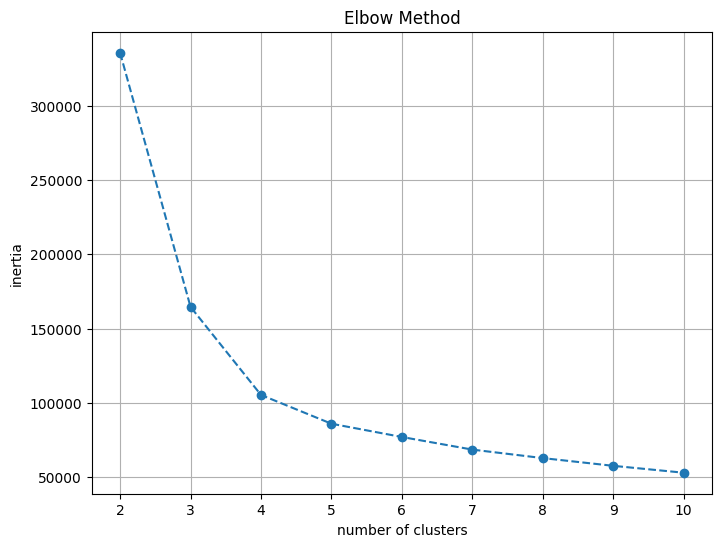

In [ ]:
# 적절한 군집 갯수 => Elbow Method
num_clusters = range(2, 11)
inertia = []
for num in num_clusters:
    kmeans = KMeans(n_clusters=num, random_state=42)
    kmeans.fit(pivot_df)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(8, 6))
plt.plot(num_clusters, inertia, marker='o', linestyle='--')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.title('Elbow Method')
plt.grid()
plt.show()

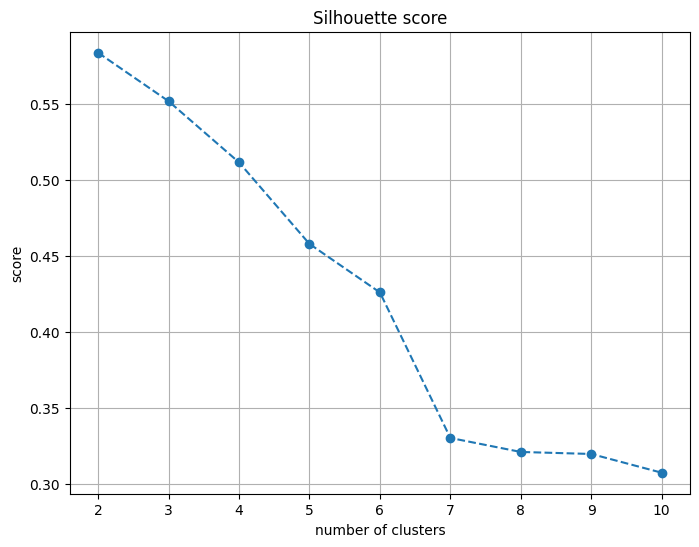

In [ ]:
# Silhouette score
num_clusters_range = range(2, 11)

silhouette_scores = []

for num in num_clusters:
    kmeans = KMeans(n_clusters=num, random_state=42)
    cluster_labels = kmeans.fit_predict(pivot_df)
    silhouette_avg = silhouette_score(pivot_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8, 6))
plt.plot(num_clusters, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('number of clusters')
plt.ylabel('score')
plt.title('Silhouette score')
plt.grid()
plt.show()

In [ ]:
# elbow method와 silhouette score를 종합적으로 판단하면 cluster 수가 4개가 적절하다고 판단
model = TimeSeriesKMeans(n_clusters=4, metric="dtw", max_iter=10,random_state=52)
cluster_labels = model.fit_predict(pivot_df)
pivot_df['cluster'] = cluster_labels

In [ ]:
country0 = list(pivot_df[pivot_df['cluster'] == 0].index)
country1 = list(pivot_df[pivot_df['cluster'] == 1].index)
country2 = list(pivot_df[pivot_df['cluster'] == 2].index)
country3 = list(pivot_df[pivot_df['cluster'] == 3].index)

## **출생률 클러스터링 시각화**

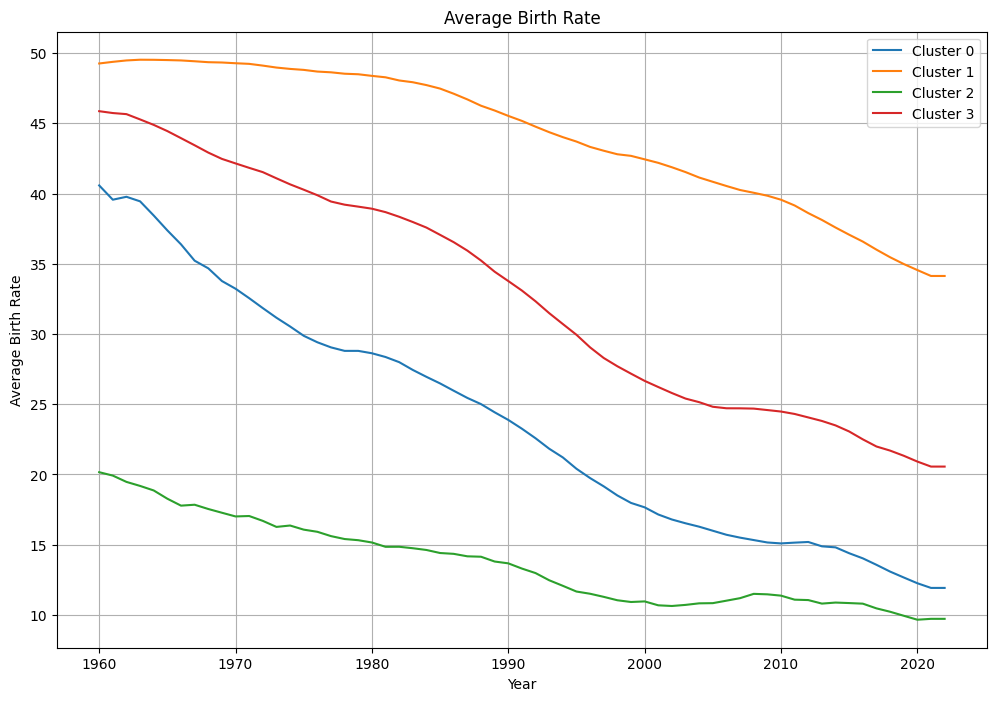

In [ ]:
# 클러스터링 별로 연도별 출생률 평균값 계산
cluster_means = pivot_df.groupby('cluster').mean()

# 시각화
plt.figure(figsize=(12, 8))
for cluster_label, cluster_mean in cluster_means.iterrows():
    plt.plot(cluster_mean.index, cluster_mean.values, label=f'Cluster {cluster_label}')
plt.xlabel('Year')
plt.ylabel('Average Birth Rate')
plt.title('Average Birth Rate')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
birth_cluster0 = pivot_df[pivot_df['cluster']==0].drop(['cluster'],axis=1)
birth_cluster1 = pivot_df[pivot_df['cluster']==1].drop(['cluster'],axis=1)
birth_cluster2 = pivot_df[pivot_df['cluster']==2].drop(['cluster'],axis=1)
birth_cluster3 = pivot_df[pivot_df['cluster']==3].drop(['cluster'],axis=1)

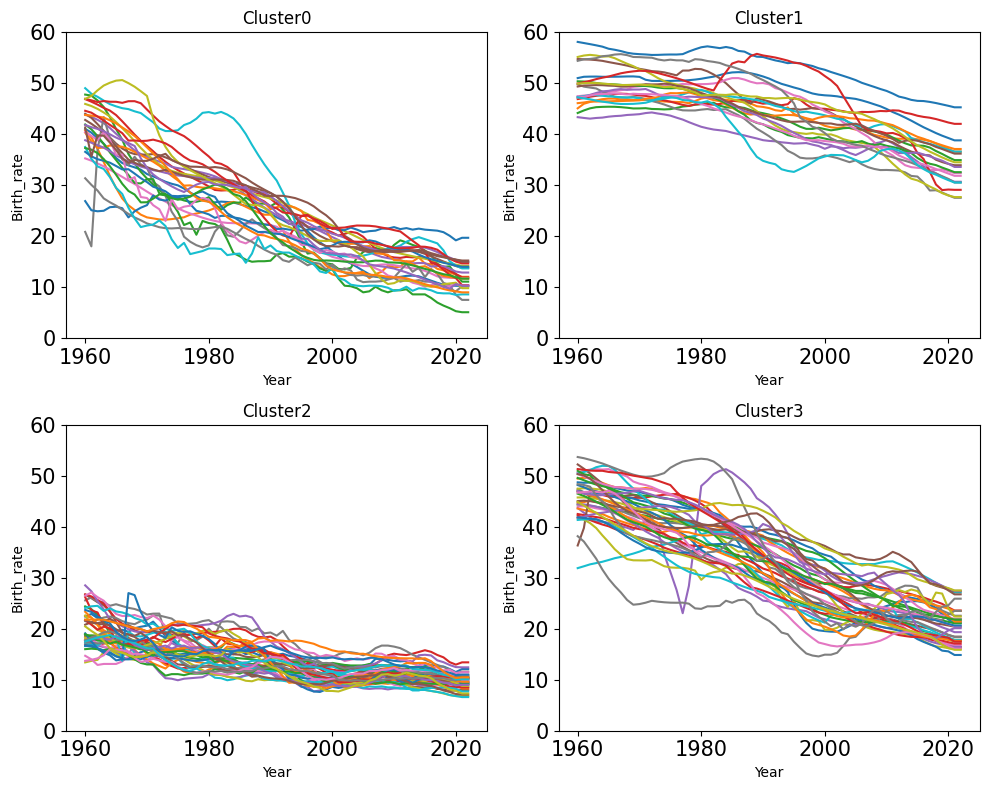

In [ ]:
# cluster별 birth_rate 지수 추세 확인
fig, axes = plt.subplots(2, 2, figsize=(10,8))
ax1 = plt.subplot(2, 2, 1)
for country, row in birth_cluster0.iterrows():
    plt.plot(birth_cluster0.columns, row)
    plt.ylim(0,60)
plt.title('Cluster0')
ax2 = plt.subplot(2, 2, 2)
for country, row in birth_cluster1.iterrows():
    plt.plot(birth_cluster1.columns, row)
    plt.ylim(0,60)
plt.title('Cluster1')
ax3 = plt.subplot(2, 2, 3)
for country, row in birth_cluster2.iterrows():
    plt.plot(birth_cluster2.columns, row)
    plt.ylim(0,60)
plt.title('Cluster2')
ax4 = plt.subplot(2, 2, 4)
for country, row in birth_cluster3.iterrows():
    plt.plot(birth_cluster3.columns, row)
    plt.ylim(0,60)
plt.title('Cluster3')

for i in np.arange(0,2):
    for j in np.arange(0,2):
        axes[i][j].set(ylabel='Birth_rate')
        axes[i][j].set(xlabel='Year')
        axes[i][j].tick_params(labelsize=15)

plt.tight_layout()
plt.show()

## **상관계수가 높은 변수의 군집화 경향 확인**

**상관계수** <br>**+)** 'infant': 0.858216 <br>**-)** 'GNI': 0.480130

In [ ]:
df.columns

Index(['agricultural_land%', 'access_to_electricity%',
       'electric_power_consumption', 'population_density',
       'individuals_using_internet%', 'military_expenditure%',
       'government_expenditure_on_education%', 'GNI', 'infant', 'birth_rate',
       'year', 'country'],
      dtype='object')

In [ ]:
# infant
cluster = pivot_df['cluster']
infant_df = df[['year','country','infant']]
infant = infant_df.pivot_table(index='country',columns='year',values='infant')
infant = pd.concat([infant,cluster],axis=1)
infant

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,cluster
country,,,,,,,,,,,,,,,,,,,,,
Albania,0.299025,0.299025,0.299025,0.299025,0.299025,0.299025,0.299025,0.299025,0.299025,0.299025,...,0.028705,0.028000,0.027418,0.027233,0.027264,0.027172,0.027417,0.027604,0.027604,0
Algeria,0.547572,0.548865,0.550158,0.551970,0.553978,0.556902,0.556998,0.554864,0.553658,0.549322,...,0.078985,0.078040,0.077148,0.075959,0.074732,0.073159,0.071506,0.069743,0.069743,3
Angola,0.516449,0.516449,0.516449,0.516449,0.516449,0.516449,0.516449,0.516449,0.516449,0.516449,...,0.225657,0.216080,0.207759,0.200411,0.193919,0.187584,0.181193,0.175557,0.175557,1
Armenia,0.248752,0.248752,0.248752,0.248752,0.248752,0.248752,0.248752,0.248752,0.248752,0.248752,...,0.045943,0.046707,0.042445,0.041351,0.038109,0.036123,0.034134,0.032092,0.032092,0
Australia,0.071804,0.069307,0.069541,0.067927,0.067356,0.066111,0.062412,0.063683,0.062352,0.062505,...,0.006795,0.006587,0.006404,0.006529,0.006529,0.006701,0.006669,0.005823,0.005823,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Venezuela, RB",0.221216,0.214088,0.208942,0.204472,0.200790,0.197384,0.194076,0.190958,0.187780,0.184151,...,0.054547,0.058524,0.076910,0.078090,0.080299,0.081419,0.079699,0.078275,0.078275,3
Vietnam,0.215646,0.215646,0.215646,0.215646,0.215646,0.215646,0.215163,0.211690,0.206019,0.206901,...,0.062962,0.062335,0.061961,0.061290,0.060430,0.059808,0.059249,0.058743,0.058743,0
"Yemen, Rep.",1.000000,1.000000,1.000000,1.000000,1.000000,0.977369,0.948662,0.919284,0.889251,0.857683,...,0.169304,0.172754,0.172552,0.172471,0.174116,0.174282,0.171638,0.175832,0.175832,1


In [ ]:
infant0 = infant[infant['cluster']==0].drop(['cluster'],axis=1)
infant1 = infant[infant['cluster']==1].drop(['cluster'],axis=1)
infant2 = infant[infant['cluster']==2].drop(['cluster'],axis=1)
infant3 = infant[infant['cluster']==3].drop(['cluster'],axis=1)

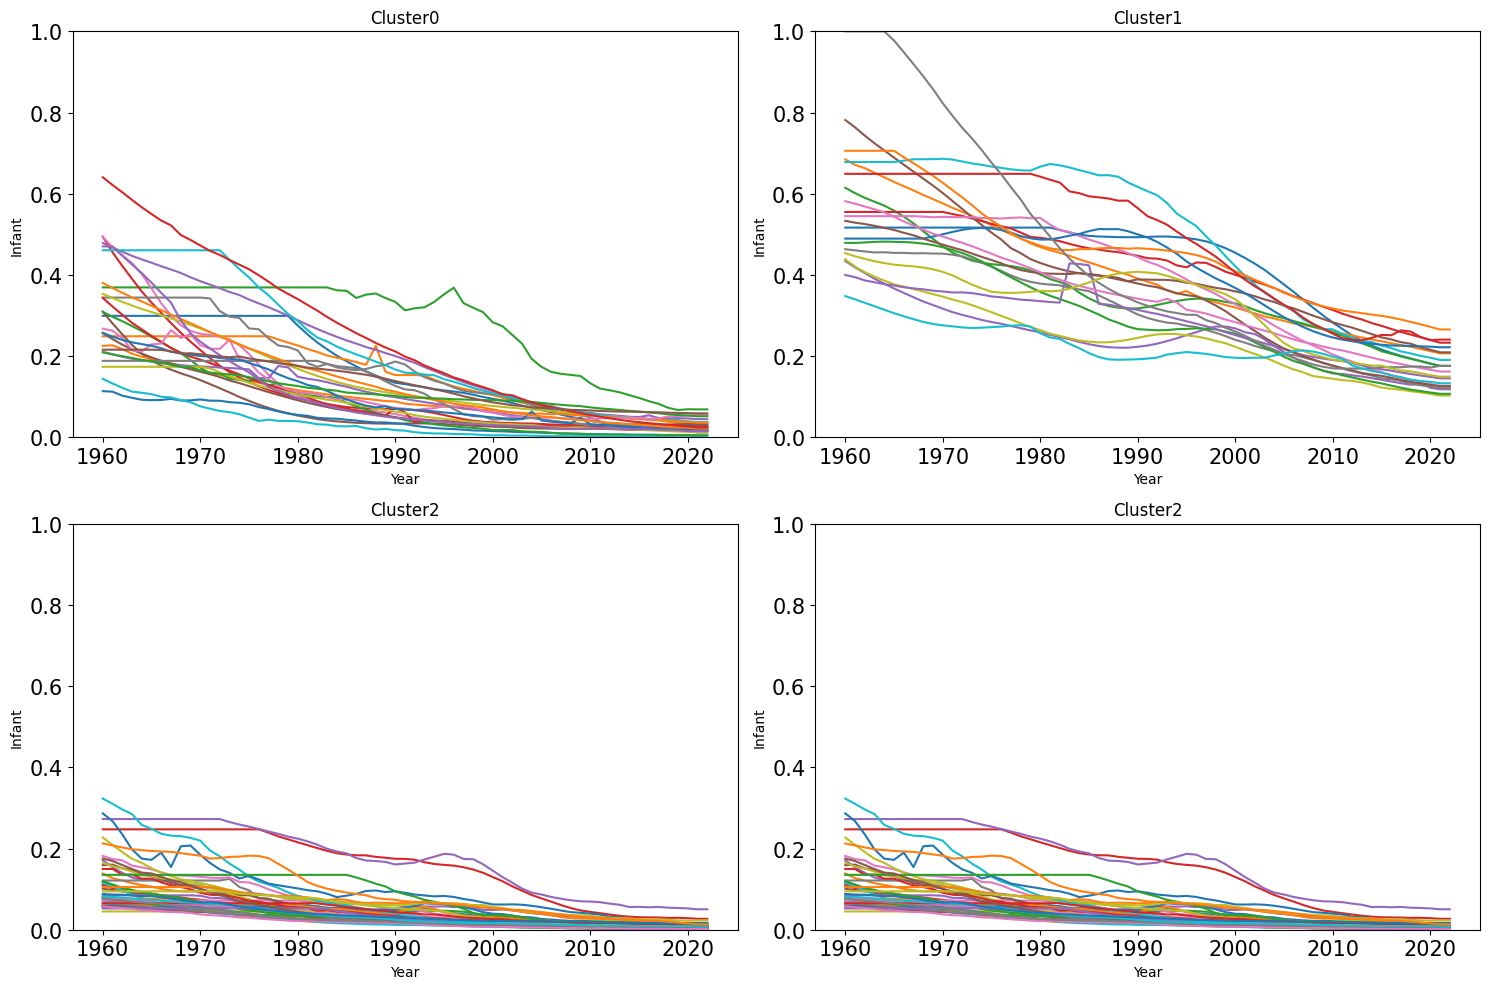

In [ ]:
# cluster별 infant 지수 추세 확인
fig, axes = plt.subplots(2, 2, figsize=(15,10))
ax1 = plt.subplot(2, 2, 1)
for country, row in infant0.iterrows():
    plt.plot(infant0.columns, row)
    plt.ylim(0,1)
plt.title('Cluster0')
ax2 = plt.subplot(2, 2, 2)
for country, row in infant1.iterrows():
    plt.plot(infant1.columns, row)
    plt.ylim(0,1)
plt.title('Cluster1')
ax3 = plt.subplot(2, 2, 3)
for country, row in infant2.iterrows():
    plt.plot(infant2.columns, row)
    plt.ylim(0,1)
plt.title('Cluster2')
ax4 = plt.subplot(2, 2, 4)
for country, row in infant2.iterrows():
    plt.plot(infant3.columns, row)
    plt.ylim(0,1)
plt.title('Cluster2')

for i in np.arange(0,2):
    for j in np.arange(0,2):
        axes[i][j].set(ylabel='Infant')
        axes[i][j].set(xlabel='Year')
        axes[i][j].tick_params(labelsize=15)

plt.tight_layout()
plt.show()

In [ ]:
# GNI
cluster = pivot_df['cluster']
gni_df = df[['year','country','GNI']]
gni = gni_df.pivot_table(index='country',columns='year',values='GNI')
gni = pd.concat([gni,cluster],axis=1)
gni

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,cluster
country,,,,,,,,,,,,,,,,,,,,,
Albania,0.005738,0.005738,0.005738,0.005738,0.005738,0.005738,0.005738,0.005738,0.005738,0.005738,...,0.042115,0.036440,0.038189,0.041398,0.048153,0.048559,0.047912,0.057359,0.060918,0
Algeria,0.002467,0.002225,0.001593,0.001994,0.002067,0.002139,0.001998,0.002215,0.002510,0.002767,...,0.049137,0.037251,0.035790,0.037112,0.037053,0.035745,0.029920,0.033104,0.038134,3
Angola,0.006011,0.006011,0.006011,0.006011,0.006011,0.006011,0.006011,0.006011,0.006011,0.006011,...,0.043314,0.026784,0.014693,0.019469,0.020862,0.017693,0.012386,0.015873,0.025236,1
Armenia,0.005470,0.005470,0.005470,0.005470,0.005470,0.005470,0.005470,0.005470,0.005470,0.005470,...,0.038252,0.034752,0.034299,0.038126,0.040671,0.044598,0.040427,0.043946,0.061203,0
Australia,0.016461,0.017026,0.016884,0.017811,0.019361,0.020793,0.021260,0.023299,0.024550,0.026826,...,0.556353,0.507668,0.445029,0.479456,0.506388,0.485266,0.461991,0.546217,0.567961,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Venezuela, RB",0.007882,0.007974,0.008423,0.008959,0.007190,0.007177,0.007293,0.007490,0.007874,0.007915,...,0.144258,0.144258,0.144258,0.144258,0.144258,0.144258,0.144258,0.144258,0.144258,3
Vietnam,0.000767,0.000767,0.000767,0.000767,0.000767,0.000767,0.000767,0.000767,0.000767,0.000767,...,0.022384,0.022400,0.023728,0.025578,0.028222,0.030188,0.031261,0.032459,0.036101,0
"Yemen, Rep.",0.003718,0.003718,0.003718,0.003718,0.003718,0.003718,0.003718,0.003718,0.003718,0.003718,...,0.013256,0.013056,0.009641,0.008039,0.006292,0.006292,0.006292,0.006292,0.006292,1


In [ ]:
gni0 = gni[gni['cluster']==0].drop(['cluster'],axis=1)
gni1 = gni[gni['cluster']==1].drop(['cluster'],axis=1)
gni2 = gni[gni['cluster']==2].drop(['cluster'],axis=1)
gni3 = gni[gni['cluster']==3].drop(['cluster'],axis=1)

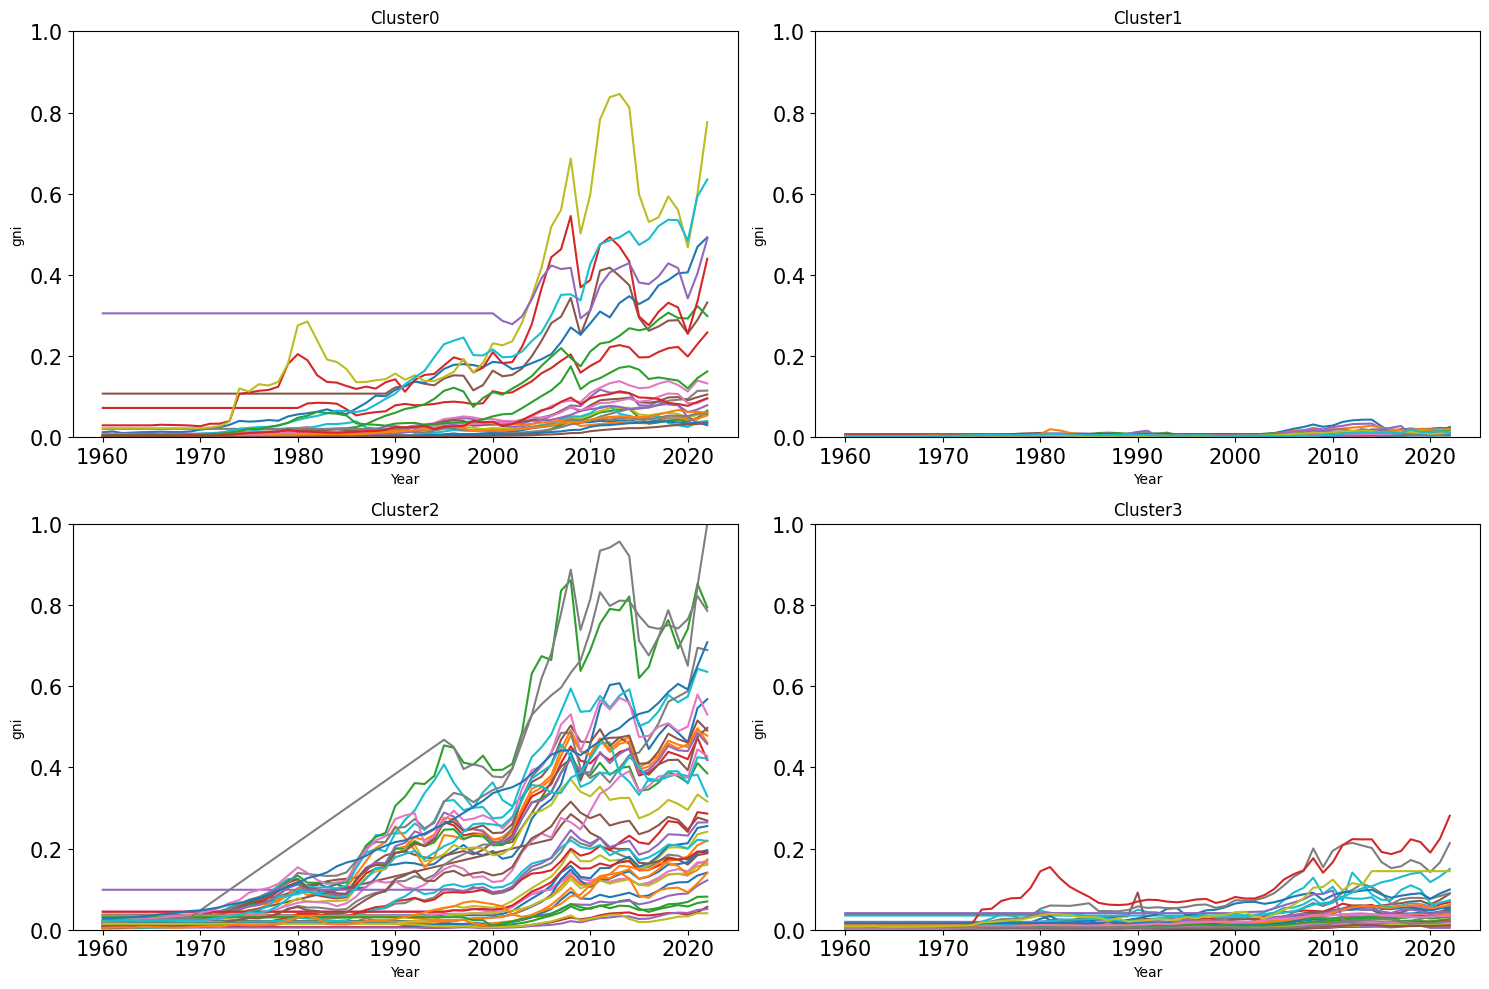

In [ ]:
# cluster별 gni 지수 추세 확인
fig, axes = plt.subplots(2, 2, figsize=(15,10))
ax1 = plt.subplot(2, 2, 1)
for country, row in gni0.iterrows():
    plt.plot(gni0.columns, row)
    plt.ylim(0,1)
plt.title('Cluster0')
ax2 = plt.subplot(2, 2, 2)
for country, row in gni1.iterrows():
    plt.plot(gni1.columns, row)
    plt.ylim(0,1)
plt.title('Cluster1')
ax3 = plt.subplot(2, 2, 3)
for country, row in gni2.iterrows():
    plt.plot(gni2.columns, row)
    plt.ylim(0,1)
plt.title('Cluster2')
ax4 = plt.subplot(2, 2, 4)
for country, row in gni3.iterrows():
    plt.plot(gni3.columns, row)
    plt.ylim(0,1)
plt.title('Cluster3')

for i in np.arange(0,2):
    for j in np.arange(0,2):
        axes[i][j].set(ylabel='gni')
        axes[i][j].set(xlabel='Year')
        axes[i][j].tick_params(labelsize=15)

plt.tight_layout()
plt.show()

# **단변량 시계열 예측**

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 28.7 MB/s eta 0:00:00


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
import math
import itertools

## **한국 예측**

In [ ]:
pivot_df[pivot_df.index=='Korea, Rep.']

year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,cluster
country,,,,,,,,,,,,,,,,,,,,,
"Korea, Rep.",41.93,40.983,39.657,38.083,36.448,34.947,33.429,32.015,30.454,30.361,...,8.6,8.6,7.9,7.0,6.4,5.9,5.3,5.1,5.1,0


In [ ]:
for i in [birth_cluster0,birth_cluster1,birth_cluster2,birth_cluster3]:
  if any(i.index=='Korea, Rep.'):
    kor=i[i.index=='Korea, Rep.']
kor=kor.T
kor=kor.reset_index(drop=True)
kor=kor['Korea, Rep.']; kor

0     41.930
1     40.983
2     39.657
3     38.083
4     36.448
       ...  
58     6.400
59     5.900
60     5.300
61     5.100
62     5.100
Name: Korea, Rep., Length: 63, dtype: float64

In [ ]:
a = pd.Series(df['year'].unique(), name='year')
time = pd.DataFrame(a)
time['year'] = pd.to_datetime(df['year'],format='%Y')
kor = pd.concat([time, kor],axis=1)
kor = kor.set_index('year')
kor

,"Korea, Rep."
year,
1960-01-01,41.930
1961-01-01,40.983
1962-01-01,39.657
1963-01-01,38.083
1964-01-01,36.448
...,...
2018-01-01,6.400
2019-01-01,5.900
2020-01-01,5.300


In [ ]:
start_date = '2023-01-01'
end_date = '2051-01-01'
date = pd.date_range(start=start_date, end=end_date, freq='AS',closed='left')

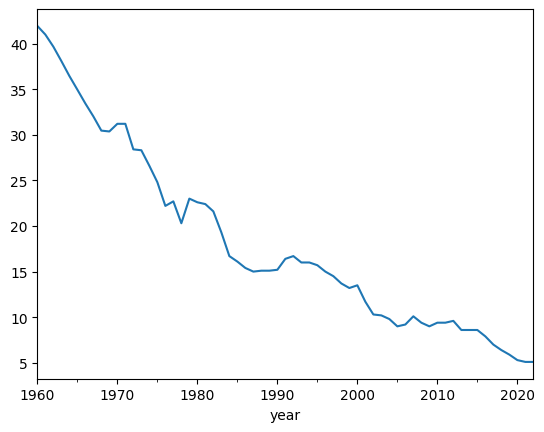

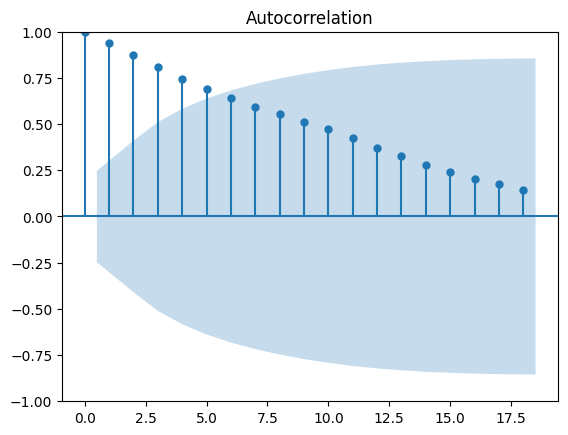

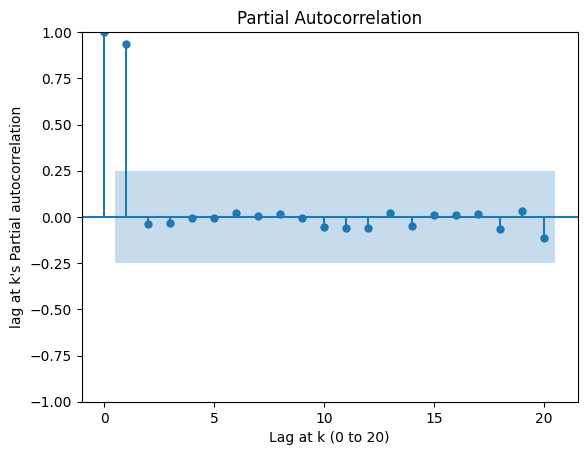

In [ ]:
# 1) 차분 적용 전 birth_rate 추세 확인
# 2) 자기상관함수검정(autocorrelation)확인
def pacf_plot(data, N_LAGS, pval):
    plot_pacf(data, lags=N_LAGS, alpha=pval, method='ywm')
    plt.xlabel(f'Lag at k (0 to {N_LAGS})')
    plt.ylabel("lag at k's Partial autocorrelation")
    plt.show()
kor['Korea, Rep.'].plot()
plot_acf(kor['Korea, Rep.'])
pacf_plot(kor['Korea, Rep.'], 20, 0.05)
plt.show()

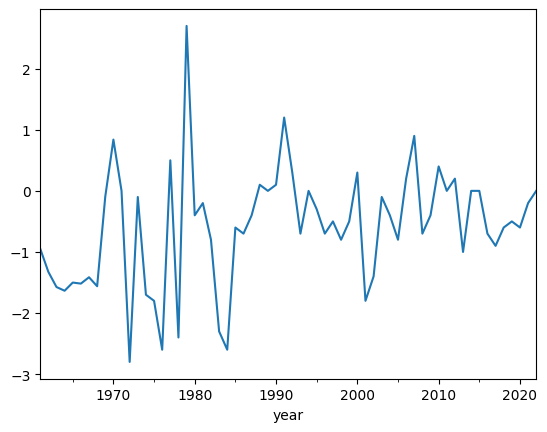

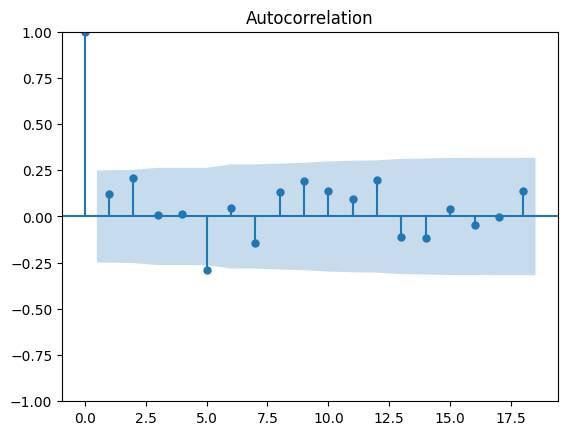

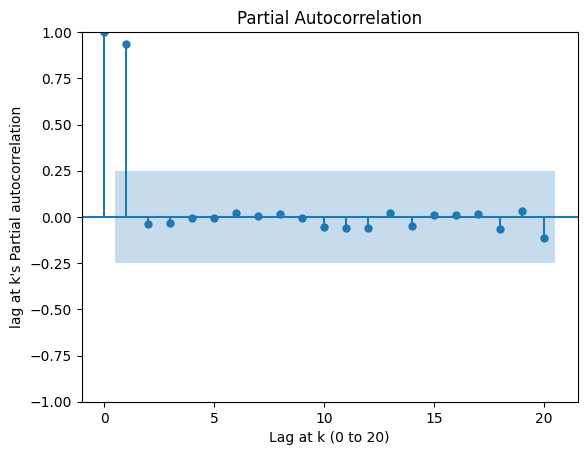

In [ ]:
# 1) 그래프 추세가 보이는 것을 확인해 정상성 만족 X -> 차분 적용
diff_1=kor['Korea, Rep.'].diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
pacf_plot(kor['Korea, Rep.'], 20, 0.05)
plt.show()

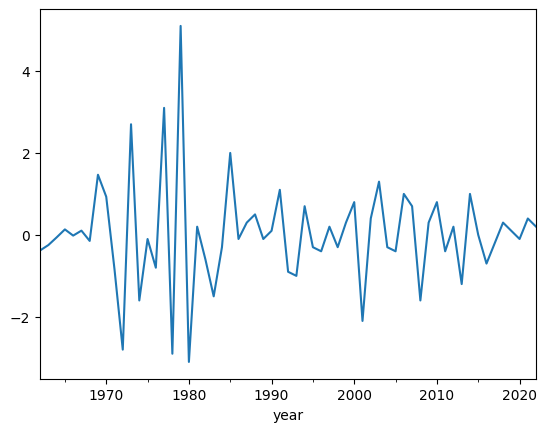

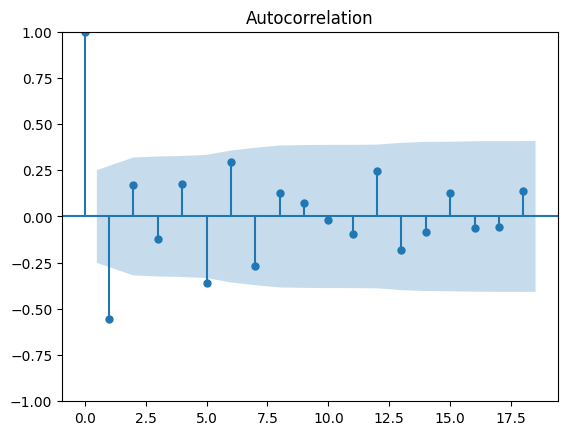

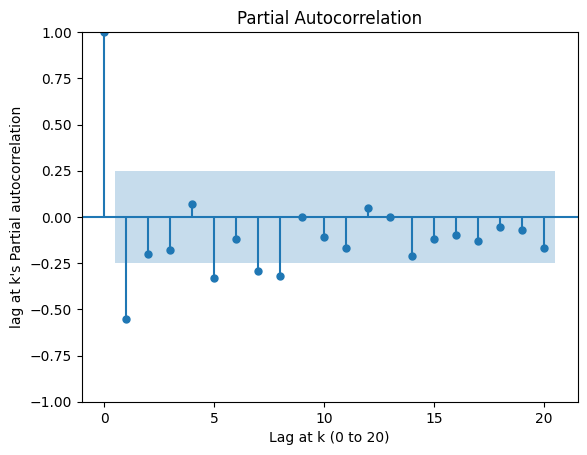

In [ ]:
# 2) 2차 차분
diff_2=diff_1.diff(periods=1).iloc[1:]
diff_2.plot()
plot_acf(diff_2)
pacf_plot(diff_2, 20, 0.05)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

model = 
(kor, start_p=0, max_p=3, start_q=0, max_q=3,
                   seasonal=False, d=2, trace=True, error_action='ignore',
                   suppress_warnings=True, stepwise=False)

 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=208.740, Time=0.09 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=188.606, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=188.125, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=188.152, Time=0.04 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0] intercept
Total fit time: 3.047 

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(kor, order=(2,2,0))
model_fit = model.fit()
model_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Korea, Rep.   No. Observations:                   63
Model:                 ARIMA(2, 2, 0)   Log Likelihood                 -90.089
Date:                Sun, 15 Oct 2023   AIC                            186.178
Time:                        13:44:15   BIC                            192.511
Sample:                    01-01-1960   HQIC                           188.660
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6579      0.139     -4.719      0.000      -0.931      -0.385
ar.L2         -0.1965      0.132     -1.491      0.136      -0.455       0.062
sigma2         1.1148      0.157      7.107      0.000       0.807       1.422
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                17.35
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               0.20   Skew:                             0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

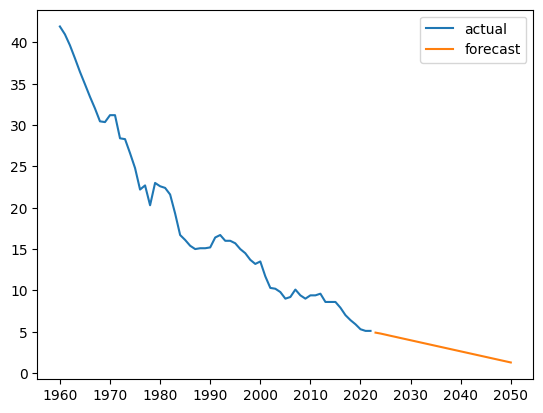

In [ ]:
plt.plot(kor,label='actual')
forecast = model_fit.forecast(28)
forecast = np.clip(forecast, 0, None)
plt.plot(date, forecast,label='forecast')
plt.legend()
plt.show()

In [ ]:
forecast

2023-01-01    4.889819
2024-01-01    4.778623
2025-01-01    4.643601
2026-01-01    4.504806
2027-01-01    4.373174
2028-01-01    4.237571
2029-01-01    4.103173
2030-01-01    3.968763
2031-01-01    3.834124
2032-01-01    3.699637
2033-01-01    3.565096
2034-01-01    3.430560
2035-01-01    3.296032
2036-01-01    3.161497
2037-01-01    3.026965
2038-01-01    2.892433
2039-01-01    2.757901
2040-01-01    2.623368
2041-01-01    2.488836
2042-01-01    2.354303
2043-01-01    2.219771
2044-01-01    2.085239
2045-01-01    1.950706
2046-01-01    1.816174
2047-01-01    1.681641
2048-01-01    1.547109
2049-01-01    1.412577
2050-01-01    1.278044
Freq: AS-JAN, Name: predicted_mean, dtype: float64

## **클러스터별 시계열 예측**

### **클러스터0**

In [ ]:
# 클러스터0 시계열
df0 = birth_cluster0.T
df0['birth_rate'] = df0.mean(axis=1)
df0

country,Albania,Armenia,Azerbaijan,Bahrain,Brazil,Brunei Darussalam,Chile,China,Colombia,"Iran, Islamic Rep.",...,North Macedonia,Qatar,Singapore,Sri Lanka,Thailand,Trinidad and Tobago,Turkiye,United Arab Emirates,Vietnam,birth_rate
year,,,,,,,,,,,,,,,,,,,,,
1960,41.068,40.787,47.791,46.900,43.860,44.017,35.275,20.86,45.957,49.046,...,31.375,46.935,37.5,36.560,43.782,37.307,44.610,41.814,41.331,40.575846
1961,40.332,39.380,47.587,46.396,43.431,43.231,34.825,18.02,45.547,47.959,...,30.084,47.525,35.2,35.672,43.674,36.987,44.240,41.392,35.609,39.559308
1962,39.216,37.162,46.637,45.823,42.844,41.991,34.277,37.01,44.983,47.354,...,28.964,48.623,33.7,35.113,43.485,36.315,43.491,41.062,39.800,39.766731
1963,38.149,34.569,45.350,45.180,42.176,40.673,33.717,43.37,44.280,46.611,...,27.423,49.563,33.2,34.809,43.295,35.139,42.681,40.601,39.719,39.442615
1964,36.825,31.821,43.387,44.646,41.238,39.373,33.063,39.14,43.495,45.916,...,26.668,50.115,31.6,34.432,42.737,33.732,41.846,40.003,38.366,38.433577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,10.517,13.307,14.000,13.818,14.133,15.050,11.940,10.86,14.841,17.231,...,10.300,10.598,8.8,14.805,9.662,12.557,16.481,10.049,15.873,13.083615
2019,10.343,12.892,14.100,13.198,13.633,14.585,11.855,10.41,14.682,15.118,...,9.600,10.743,8.8,14.534,9.377,12.359,15.594,9.750,15.663,12.664192
2020,10.285,12.455,12.500,12.621,13.078,14.165,11.834,8.52,14.435,14.231,...,9.200,10.895,8.5,14.235,9.182,11.946,15.033,10.620,15.400,12.253615


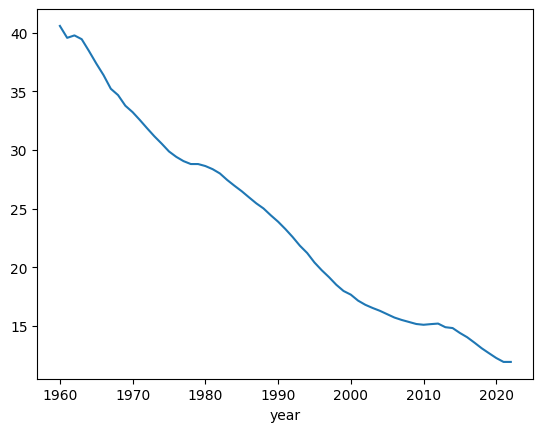

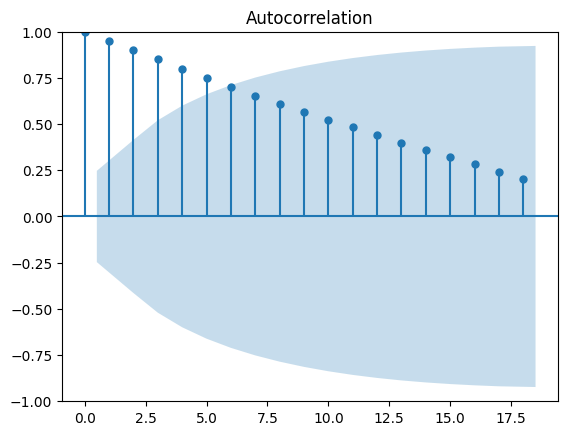

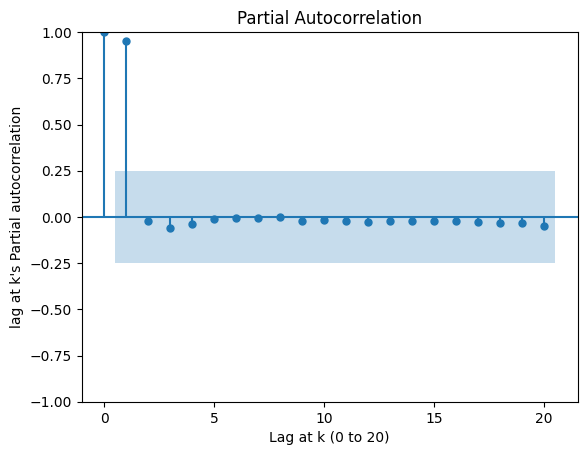

In [ ]:
# 클러스터0
# 1) 차분 적용 전 birth_rate 추세 확인
# 2) 자기상관함수검정(autocorrelation)확인
def pacf_plot(data, N_LAGS, pval):
    plot_pacf(data, lags=N_LAGS, alpha=pval, method='ywm')
    plt.xlabel(f'Lag at k (0 to {N_LAGS})')
    plt.ylabel("lag at k's Partial autocorrelation")
    plt.show()
df0['birth_rate'].plot()
plot_acf(df0['birth_rate'])
pacf_plot(df0['birth_rate'], 20, 0.05)
plt.show()

In [ ]:
# 1) 그래프 추세가 보이는 것을 확인해 정상성 만족 x -> 차분 적용
diff_1=df0['birth_rate'].diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
pacf_plot(df0['birth_rate'], 20, 0.05)
plt.show()

In [ ]:
# 2) 2차 차분
diff_2=diff_1.diff(periods=1).iloc[1:]
diff_2.plot()
plot_acf(diff_2)
pacf_plot(diff_2, 20, 0.05)
plt.show()

In [ ]:
a = pd.Series(df['year'].unique(), name='year')
time = pd.DataFrame(a)
time['year'] = pd.to_datetime(df['year'],format='%Y')
data = df0['birth_rate'].reset_index(drop=True)
re_data = pd.concat([time, data],axis=1)
birth0 = re_data.set_index('year')
birth0

In [ ]:
model = auto_arima(birth0.values, start_p=0, max_p=3,
                start_q=0, max_q=3,
                seasonal=False,
                d=2,
                trace=True,
                error_action='ignore',
                suppress_warnings=True,
                stepwise=False)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
model = ARIMA(birth0.values, order=(0,2,1))
model_fit = model.fit()
model_fit.summary()

In [ ]:
plt.plot(birth0,label='actual')
forecast = model_fit.forecast(28)
forecast = np.clip(forecast, 0, None)
plt.plot(date, forecast,label='forecast')
plt.legend()
plt.show()

In [ ]:
forecast

### **클러스터1**

In [ ]:
# 클러스터1 시계열
df1 = birth_cluster1.T
df1['birth_rate'] = df1.mean(axis=1)
df1

In [ ]:
# 클러스터1
# 1)차분 적용 전 birth_rate 추세 확인
# 2) 자기상관함수검정(autocorrelation)확인
def pacf_plot(data, N_LAGS, pval):
    plot_pacf(data, lags=N_LAGS, alpha=pval, method='ywm')
    plt.xlabel(f'Lag at k (0 to {N_LAGS})')
    plt.ylabel("lag at k's Partial autocorrelation")
    plt.show()
df1['birth_rate'].plot()
plot_acf(df1['birth_rate'])
pacf_plot(df1['birth_rate'], 20, 0.05)
plt.show()

In [ ]:
# 1) 그래프 추세가 보이는 것을 확인해 정상성 만족 x -> 차분 적용
diff_1=df1['birth_rate'].diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
pacf_plot(df1['birth_rate'], 20, 0.05)
plt.show()

In [ ]:
# 2) 2차 차분
diff_2=diff_1.diff(periods=1).iloc[1:]
diff_2.plot()
plot_acf(diff_2)
pacf_plot(diff_2, 20, 0.05)
plt.show()

In [ ]:
a = pd.Series(df['year'].unique(), name='year')
time = pd.DataFrame(a)
time['year'] = pd.to_datetime(df['year'],format='%Y')
data = df1['birth_rate'].reset_index(drop=True)
re_data = pd.concat([time, data],axis=1)
birth1 = re_data.set_index('year')
birth1

In [ ]:
from sklearn.model_selection import train_test_split
model = auto_arima(birth1.values, start_p=0, max_p=3,
                start_q=0, max_q=3,
                seasonal=False,
                d=2,
                trace=True,
                error_action='ignore',
                suppress_warnings=True,
                stepwise=False)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
model = ARIMA(birth1.values, order=(1,2,1))
model_fit = model.fit()
model_fit.summary()

In [ ]:
plt.plot(birth1,label='actual')
forecast = model_fit.forecast(28)
forecast = np.clip(forecast, 0, None)
plt.plot(date, forecast,label='forecast')
plt.legend()
plt.show()

In [ ]:
forecast

### **클러스터2**

In [ ]:
# 클러스터2 시계열
df2 = birth_cluster2.T
df2['birth_rate'] = df2.mean(axis=1)

In [ ]:
# 클러스터2
# 1) 차분 적용 전 birth_rate 추세 확인
# 2) 자기상관함수검정(autocorrelation)확인
def pacf_plot(data, N_LAGS, pval):
    plot_pacf(data, lags=N_LAGS, alpha=pval, method='ywm')
    plt.xlabel(f'Lag at k (0 to {N_LAGS})')
    plt.ylabel("lag at k's Partial autocorrelation")
    plt.show()
df2['birth_rate'].plot()
plot_acf(df2['birth_rate'])
pacf_plot(df2['birth_rate'], 20, 0.05)
plt.show()

In [ ]:
# 1) 그래프 추세가 보이는 것을 확인해 정상성 만족 x -> 차분 적용
diff_1=df2['birth_rate'].diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
pacf_plot(df2['birth_rate'], 20, 0.05)
plt.show()

In [ ]:
# 2)2차 차분
diff_2=diff_1.diff(periods=1).iloc[1:]
diff_2.plot()
plot_acf(diff_2)
pacf_plot(diff_2, 20, 0.05)
plt.show()

In [ ]:
a = pd.Series(df['year'].unique(), name='year')
time = pd.DataFrame(a)
time['year'] = pd.to_datetime(df['year'],format='%Y')
data = df2['birth_rate'].reset_index(drop=True)
re_data = pd.concat([time, data],axis=1)
birth2 = re_data.set_index('year')

In [ ]:
from sklearn.model_selection import train_test_split
model = auto_arima(birth2, start_p=0, max_p=3,
                start_q=0, max_q=3,
                seasonal=False,
                d=2,
                trace=True,
                error_action='ignore',
                suppress_warnings=True,
                stepwise=False)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
model = ARIMA(birth2, order=(0,2,1))
model_fit = model.fit()
model_fit.summary()

In [ ]:
plt.plot(birth2,label='actual')
forecast = model_fit.forecast(28)
forecast = np.clip(forecast, 0, None)
plt.plot(date, forecast,label='forecast')
plt.legend()
plt.show()

In [ ]:
forecast

### **클러스터3**

In [ ]:
# 클러스터3 시계열
df3 = birth_cluster3.T
df3['birth_rate'] = df3.mean(axis=1)

In [ ]:
# 클러스터3
# 1) 차분 적용 전 birth_rate 추세 확인
# 2) 자기상관함수검정(autocorrelation)확인
def pacf_plot(data, N_LAGS, pval):
    plot_pacf(data, lags=N_LAGS, alpha=pval, method='ywm')
    plt.xlabel(f'Lag at k (0 to {N_LAGS})')
    plt.ylabel("lag at k's Partial autocorrelation")
    plt.show()
df3['birth_rate'].plot()
plot_acf(df3['birth_rate'])
pacf_plot(df3['birth_rate'], 20, 0.05)
plt.show()

In [ ]:
# 1) 그래프 추세가 보이는 것을 확인해 정상성 만족 x -> 차분 적용
diff_1=df3['birth_rate'].diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
pacf_plot(df3['birth_rate'], 20, 0.05)
plt.show()

In [ ]:
# 2)2차 차분
diff_2=diff_1.diff(periods=1).iloc[1:]
diff_2.plot()
plot_acf(diff_2)
pacf_plot(diff_2, 20, 0.05)
plt.show()

In [ ]:
a = pd.Series(df['year'].unique(), name='year')
time = pd.DataFrame(a)
time['year'] = pd.to_datetime(df['year'],format='%Y')
data = df3['birth_rate'].reset_index(drop=True)
re_data = pd.concat([time, data],axis=1)
birth3 = re_data.set_index('year')

In [ ]:
from sklearn.model_selection import train_test_split
model = auto_arima(birth3, start_p=0, max_p=3,
                start_q=0, max_q=3,
                seasonal=False,
                d=2,
                trace=True,
                error_action='ignore',
                suppress_warnings=True,
                stepwise=False)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
model = ARIMA(birth3, order=(0,2,1))
model_fit = model.fit()
model_fit.summary()

In [ ]:
plt.plot(birth3,label='actual')
forecast = model_fit.forecast(28)
forecast = np.clip(forecast, 0, None)
plt.plot(date, forecast,label='forecast')
plt.legend()
plt.show()

In [ ]:
forecast

# **다변량 시계열 예측 (VAR)**

In [ ]:
mdf=pd.merge(df,pivot_df['cluster'],on='country',how='outer')
mdf

In [ ]:
cluster0=mdf[mdf.cluster==0].drop('cluster',axis=1)
cluster1=mdf[mdf.cluster==1].drop('cluster',axis=1)
cluster2=mdf[mdf.cluster==2].drop('cluster',axis=1)
cluster3=mdf[mdf.cluster==3].drop('cluster',axis=1)

## **클러스터0**

### **회귀분석(변수선택)**

In [ ]:
cluster0

In [ ]:
columns = list(cluster0.columns.difference(['country','year','birth_rate']))
cluster0 = cluster0.set_index(['country','year'])
X = cluster0[columns]
y = cluster0['birth_rate']

# 후진선택법 함수
def backward_selection(X, y):
    selected_variables = list(X.columns)
    while len(selected_variables) > 0:
        model = sm.OLS(y, sm.add_constant(X[selected_variables])).fit()
        pvalues = model.pvalues[1:] # 상수항 제외한 독립 변수의 p-값
        max_pvalue = pvalues.max()
        if max_pvalue > 0.05:
            removed_variable = pvalues.idxmax()
            selected_variables.remove(removed_variable)
        else:
            break
    return selected_variables

selected_variables = backward_selection(X, y)
print("선택된 변수:", selected_variables)

all_variables = X.columns
not_selected_variables = [var for var in all_variables if var not in selected_variables]
print("선택되지 않은 변수:", not_selected_variables)

# 선택된 변수로 회귀 모델 생성
X_selected = cluster0[selected_variables]
X_selected = sm.add_constant(X_selected) # 상수항 추가
model = sm.OLS(y, X_selected)
results = model.fit()
# 회귀분석 결과 요약
print(results.summary())

In [ ]:
# 선택되지 못한 변수 제거
cluster0.drop(not_selected_variables,axis=1,inplace=True)
cluster0

In [ ]:
# 예측값, 잔차
fitted = results.predict(X_selected)
residuals = results.resid
res = residuals.to_numpy()
c_res = pd.DataFrame(res, columns=['residuals'])

In [ ]:
# 잔차 선형성
plt.subplots(figsize=(6,4))
plt.plot([fitted.min(),fitted.max()],[0,0],'--', color='grey')
plt.title('fitted vs residuals')
sns.regplot(x=fitted, y=residuals, lowess=True, line_kws={'color':'red'})
plt.show()

In [ ]:
# 정규성 확인
from statsmodels.stats.diagnostic import normal_ad
plt.subplots(figsize=(6,4))
plt.title('Distribution of Residuals')
sns.distplot(residuals)
plt.show()

In [ ]:
# QQ 플롯(Q-Q Plot) 시각화
plt.subplots(figsize=(6,4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot")
plt.show()

In [ ]:
# 등분산성 검정
plt.subplots(figsize=(6,4))
ax = plt.subplot(111)
plt.scatter(x=c_res.index,y=c_res.residuals)
plt.plot(np.repeat(0, c_res.index.max()),color='darkorange',linestyle='--')
plt.title('Residuals')
plt.show()

### **예측**

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

In [ ]:
cluster0

In [ ]:
cluster0.reset_index(['country','year'],inplace=True)
cluster0.drop('country',axis=1,inplace=True)

In [ ]:
for year in cluster0['year'].unique():
    mean = cluster0[cluster0['year'] == year].mean()
    cluster0 = cluster0.append(mean, ignore_index=True)
    cluster0.fillna(year)

In [ ]:
cluster0['year']=pd.to_datetime(cluster0['year'],format='%Y')

In [ ]:
cluster0 = cluster0.drop(cluster0.index[:1638])
cluster0.set_index('year',inplace=True)
cluster0

In [ ]:
# 상수인 변수가 있는 지 확인
constant_columns = [col for col in cluster0.columns if cluster0[col].nunique() == 1]

print("Constant Columns:", constant_columns)

In [ ]:
from statsmodels.tsa.stattools import adfuller
target = cluster0.columns

# 각 변수에 대한 차분 및 최적의 VAR(p) 모델 차수 결정
best_order = {}
for col in target:
    # 1차 차분
    diff1 = cluster0[col].diff().dropna()
    # ADF 검정을 통해 정상성 확인
    result = adfuller(diff1)
    p_value = result[1]
    if p_value < 0.05:
        # 1차 차분이 정상성을 만족하는 경우
        best_order[col] = 1
    else:
        # 1차 차분이 정상성을 만족하지 않는 경우 2차 차분 시도
        diff2 = diff1.diff().dropna()
        result = adfuller(diff2)
        p_value = result[1]
        if p_value < 0.05:
            # 2차 차분이 정상성을 만족하는 경우
            best_order[col] = 2
        else:
            # 정상성을 만족하지 않는 경우 0차 차분 선택
            best_order[col] = 0

c0_diff = cluster0.copy()
for col in target:
    if best_order[col] == 1:
        c0_diff[col] = c0_diff[col].diff().dropna()
    elif best_order[col] == 2:
        c0_diff[col] = c0_diff[col].diff().diff().dropna()

In [ ]:
c0_diff=c0_diff.dropna()

In [ ]:
# 최적의 VAR(p) 모델 차수 결정
best_aic = float('inf')
best_order_p = None

for p in range(1, 2):  # p를 적절한 범위로 조정
    model = VAR(cluster0)
    model_fitted = model.fit(p)
    aic = model_fitted.aic
    if aic < best_aic:
        best_aic = aic
        best_order_p = p

In [ ]:
# 최적의 VAR(p) 모델 생성 및 학습
best_model = VAR(cluster0)
best_model_fitted = best_model.fit(best_order_p)

# VAR 모델 요약 정보 확인
print(best_model_fitted.summary())

# 예측 수행
forecast = best_model_fitted.forecast(cluster0.values[-best_order_p:], steps=28)

# 예측 결과를 데이터프레임으로 변환
forecast_df = pd.DataFrame(forecast, columns=target)

In [ ]:
forecast_df = np.clip(forecast_df, 0, None)

In [ ]:
plt.plot(cluster0['birth_rate'],label='actual')
plt.plot(date, forecast_df['birth_rate'],label='forecast')
plt.legend()
plt.show()

In [ ]:
forecast_df['birth_rate']

## **클러스터1**

### **회귀분석(변수선택)**

In [ ]:
cluster1

In [ ]:
columns = list(cluster1.columns.difference(['country','year','birth_rate']))
cluster1 = cluster1.set_index(['country','year'])
X = cluster1[columns]
y = cluster1['birth_rate']

# 후진선택법 함수
def backward_selection(X, y):
    selected_variables = list(X.columns)
    while len(selected_variables) > 0:
        model = sm.OLS(y, sm.add_constant(X[selected_variables])).fit()
        pvalues = model.pvalues[1:] # 상수항 제외한 독립 변수의 p-값
        max_pvalue = pvalues.max()
        if max_pvalue > 0.05:
            removed_variable = pvalues.idxmax()
            selected_variables.remove(removed_variable)
        else:
            break
    return selected_variables

selected_variables = backward_selection(X, y)
print("선택된 변수:", selected_variables)

all_variables = X.columns
not_selected_variables = [var for var in all_variables if var not in selected_variables]
print("선택되지 않은 변수:", not_selected_variables)

# 선택된 변수로 회귀 모델 생성
X_selected = cluster1[selected_variables]
X_selected = sm.add_constant(X_selected) # 상수항 추가
model = sm.OLS(y, X_selected)
results = model.fit()
# 회귀분석 결과 요약
print(results.summary())

In [ ]:
# 선택되지 못한 변수 제거
cluster1.drop(not_selected_variables,axis=1,inplace=True)
cluster1

In [ ]:
# 예측값, 잔차
fitted = results.predict(X_selected)
residuals = results.resid
res = residuals.to_numpy()
c_res = pd.DataFrame(res, columns=['residuals'])

In [ ]:
# 잔차 선형성
plt.subplots(figsize=(6,4))
plt.plot([fitted.min(),fitted.max()],[0,0],'--', color='grey')
plt.title('fitted vs residuals')
sns.regplot(x=fitted, y=residuals, lowess=True, line_kws={'color':'red'})
plt.show()

In [ ]:
# 정규성 확인
from statsmodels.stats.diagnostic import normal_ad
plt.subplots(figsize=(6,4))
plt.title('Distribution of Residuals')
sns.distplot(residuals)
plt.show()

In [ ]:
# QQ 플롯(Q-Q Plot) 시각화
plt.subplots(figsize=(6,4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot")
plt.show()

In [ ]:
# 등분산성 검정
plt.subplots(figsize=(6,4))
ax = plt.subplot(111)
plt.scatter(x=c_res.index,y=c_res.residuals)
plt.plot(np.repeat(0, c_res.index.max()),color='darkorange',linestyle='--')
plt.title('Residuals')
plt.show()

### **예측**

In [ ]:
cluster1

In [ ]:
cluster1.reset_index(['country','year'],inplace=True)
cluster1.drop('country',axis=1,inplace=True)

In [ ]:
for year in cluster1['year'].unique():
    mean = cluster1[cluster1['year'] == year].mean()
    cluster1 = cluster1.append(mean, ignore_index=True)
    cluster1.fillna(year)

In [ ]:
cluster1['year']=pd.to_datetime(cluster1['year'],format='%Y')

In [ ]:
cluster1 = cluster1.drop(cluster1.index[:1260])
cluster1.set_index('year',inplace=True)
cluster1

In [ ]:
constant_columns = [col for col in cluster1.columns if cluster1[col].nunique() == 1]

print("Constant Columns:", constant_columns)

In [ ]:
target = cluster1.columns

# 각 변수에 대한 차분 및 최적의 VAR(p) 모델 차수 결정
best_order = {}
for col in target:
    # 1차 차분
    diff1 = cluster1[col].diff().dropna()
    # ADF 검정을 통해 정상성 확인
    result = adfuller(diff1)
    p_value = result[1]
    if p_value < 0.05:
        # 1차 차분이 정상성을 만족하는 경우
        best_order[col] = 1
    else:
        # 1차 차분이 정상성을 만족하지 않는 경우 2차 차분 시도
        diff2 = diff1.diff().dropna()
        result = adfuller(diff2)
        p_value = result[1]
        if p_value < 0.05:
            # 2차 차분이 정상성을 만족하는 경우
            best_order[col] = 2
        else:
            # 정상성을 만족하지 않는 경우 0차 차분 선택
            best_order[col] = 0

c1_diff = cluster1.copy()
for col in target:
    if best_order[col] == 1:
        c1_diff[col] = c1_diff[col].diff().dropna()
    elif best_order[col] == 2:
        c1_diff[col] = c1_diff[col].diff().diff().dropna()

In [ ]:
c1_diff=c1_diff.dropna()

In [ ]:
# 최적의 VAR(p) 모델 차수 결정
best_aic = float('inf')
best_order_p = None

for p in range(1, 2):  # p를 적절한 범위로 조정
    model = VAR(cluster1)
    model_fitted = model.fit(p)
    aic = model_fitted.aic
    if aic < best_aic:
        best_aic = aic
        best_order_p = p

In [ ]:
# 최적의 VAR(p) 모델 생성 및 학습
best_model = VAR(cluster1)
best_model_fitted = best_model.fit(best_order_p)

# VAR 모델 요약 정보 확인
print(best_model_fitted.summary())

# 예측 수행
forecast = best_model_fitted.forecast(cluster1.values[-best_order_p:], steps=28)

# 예측 결과를 데이터프레임으로 변환
forecast_df = pd.DataFrame(forecast, columns=target)

In [ ]:
forecast_df = np.clip(forecast_df, 0, None)

In [ ]:
plt.plot(cluster1['birth_rate'],label='actual')
plt.plot(date, forecast_df['birth_rate'],label='forecast')
plt.legend()
plt.show()

In [ ]:
forecast_df['birth_rate']

## **클러스터2**

### **회귀분석(변수선택)**

In [ ]:
cluster2

In [ ]:
columns = list(cluster2.columns.difference(['country','year','birth_rate']))
cluster2 = cluster2.set_index(['country','year'])
X = cluster2[columns]
y = cluster2['birth_rate']

# 후진선택법 함수
def backward_selection(X, y):
    selected_variables = list(X.columns)
    while len(selected_variables) > 0:
        model = sm.OLS(y, sm.add_constant(X[selected_variables])).fit()
        pvalues = model.pvalues[1:] # 상수항 제외한 독립 변수의 p-값
        max_pvalue = pvalues.max()
        if max_pvalue > 0.05:
            removed_variable = pvalues.idxmax()
            selected_variables.remove(removed_variable)
        else:
            break
    return selected_variables

selected_variables = backward_selection(X, y)
print("선택된 변수:", selected_variables)

all_variables = X.columns
not_selected_variables = [var for var in all_variables if var not in selected_variables]
print("선택되지 않은 변수:", not_selected_variables)

# 선택된 변수로 회귀 모델 생성
X_selected = cluster2[selected_variables]
X_selected = sm.add_constant(X_selected) # 상수항 추가
model = sm.OLS(y, X_selected)
results = model.fit()
# 회귀분석 결과 요약
print(results.summary())

In [ ]:
# 선택되지 못한 변수 제거
cluster2.drop(not_selected_variables,axis=1,inplace=True)
cluster2

In [ ]:
# 예측값, 잔차
fitted = results.predict(X_selected)
residuals = results.resid
res = residuals.to_numpy()
c_res = pd.DataFrame(res, columns=['residuals'])

In [ ]:
# 잔차 선형성
plt.subplots(figsize=(6,4))
plt.plot([fitted.min(),fitted.max()],[0,0],'--', color='grey')
plt.title('fitted vs residuals')
sns.regplot(x=fitted, y=residuals, lowess=True, line_kws={'color':'red'})
plt.show()

In [ ]:
# 정규성 확인
from statsmodels.stats.diagnostic import normal_ad
plt.subplots(figsize=(6,4))
plt.title('Distribution of Residuals')
sns.distplot(residuals)
plt.show()

In [ ]:
# QQ 플롯(Q-Q Plot) 시각화
plt.subplots(figsize=(6,4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot")
plt.show()

In [ ]:
# 등분산성 검정
plt.subplots(figsize=(6,4))
ax = plt.subplot(111)
plt.scatter(x=c_res.index,y=c_res.residuals)
plt.plot(np.repeat(0, c_res.index.max()),color='darkorange',linestyle='--')
plt.title('Residuals')
plt.show()

### **예측**

In [ ]:
cluster2

In [ ]:
cluster2.reset_index(['country','year'],inplace=True)
cluster2.drop('country',axis=1,inplace=True)

In [ ]:
for year in cluster2['year'].unique():
    mean = cluster2[cluster2['year'] == year].mean()
    cluster2 = cluster2.append(mean, ignore_index=True)
    cluster2.fillna(year)

In [ ]:
cluster2['year']=pd.to_datetime(cluster2['year'],format='%Y')

In [ ]:
cluster2 = cluster2.drop(cluster2.index[:2646])
cluster2.set_index('year',inplace=True)
cluster2

In [ ]:
constant_columns = [col for col in cluster2.columns if cluster2[col].nunique() == 1]

print("Constant Columns:", constant_columns)

In [ ]:
target = cluster2.columns

# 각 변수에 대한 차분 및 최적의 VAR(p) 모델 차수 결정
best_order = {}
for col in target:
    # 1차 차분
    diff1 = cluster2[col].diff().dropna()
    # ADF 검정을 통해 정상성 확인
    result = adfuller(diff1)
    p_value = result[1]
    if p_value < 0.05:
        # 1차 차분이 정상성을 만족하는 경우
        best_order[col] = 1
    else:
        # 1차 차분이 정상성을 만족하지 않는 경우 2차 차분 시도
        diff2 = diff1.diff().dropna()
        result = adfuller(diff2)
        p_value = result[1]
        if p_value < 0.05:
            # 2차 차분이 정상성을 만족하는 경우
            best_order[col] = 2
        else:
            # 정상성을 만족하지 않는 경우 0차 차분 선택
            best_order[col] = 0

c2_diff = cluster2.copy()
for col in target:
    if best_order[col] == 1:
        c2_diff[col] = c2_diff[col].diff().dropna()
    elif best_order[col] == 2:
        c2_diff[col] = c2_diff[col].diff().diff().dropna()

In [ ]:
c2_diff=c2_diff.dropna()

In [ ]:
# 최적의 VAR(p) 모델 차수 결정
best_aic = float('inf')
best_order_p = None

for p in range(1, 2):  # p를 적절한 범위로 조정
    model = VAR(cluster2)
    model_fitted = model.fit(p)
    aic = model_fitted.aic
    if aic < best_aic:
        best_aic = aic
        best_order_p = p

In [ ]:
# 최적의 VAR(p) 모델 생성 및 학습
best_model = VAR(cluster2)
best_model_fitted = best_model.fit(best_order_p)

# VAR 모델 요약 정보 확인
print(best_model_fitted.summary())

# 예측 수행
forecast = best_model_fitted.forecast(cluster2.values[-best_order_p:], steps=28)

# 예측 결과를 데이터프레임으로 변환
forecast_df = pd.DataFrame(forecast, columns=target)

In [ ]:
forecast_df = np.clip(forecast_df, 0, None)

In [ ]:
plt.plot(cluster2['birth_rate'],label='actual')
plt.plot(date, forecast_df['birth_rate'],label='forecast')
plt.legend()
plt.show()

In [ ]:
forecast_df['birth_rate']

## **클러스터3**

### **회귀분석(변수선택)**

In [ ]:
cluster3

In [ ]:
columns = list(cluster3.columns.difference(['country','year','birth_rate']))
cluster3 = cluster3.set_index(['country','year'])
X = cluster3[columns]
y = cluster3['birth_rate']

# 후진선택법 함수
def backward_selection(X, y):
    selected_variables = list(X.columns)
    while len(selected_variables) > 0:
        model = sm.OLS(y, sm.add_constant(X[selected_variables])).fit()
        pvalues = model.pvalues[1:] # 상수항 제외한 독립 변수의 p-값
        max_pvalue = pvalues.max()
        if max_pvalue > 0.05:
            removed_variable = pvalues.idxmax()
            selected_variables.remove(removed_variable)
        else:
            break
    return selected_variables

selected_variables = backward_selection(X, y)
print("선택된 변수:", selected_variables)

all_variables = X.columns
not_selected_variables = [var for var in all_variables if var not in selected_variables]
print("선택되지 않은 변수:", not_selected_variables)

# 선택된 변수로 회귀 모델 생성
X_selected = cluster3[selected_variables]
X_selected = sm.add_constant(X_selected) # 상수항 추가
model = sm.OLS(y, X_selected)
results = model.fit()
# 회귀분석 결과 요약
print(results.summary())

In [ ]:
# 선택되지 못한 변수 제거
cluster3.drop(not_selected_variables,axis=1,inplace=True)
cluster3

In [ ]:
# 예측값, 잔차
fitted = results.predict(X_selected)
residuals = results.resid
res = residuals.to_numpy()
c_res = pd.DataFrame(res, columns=['residuals'])

In [ ]:
# 잔차 선형성
plt.subplots(figsize=(6,4))
plt.plot([fitted.min(),fitted.max()],[0,0],'--', color='grey')
plt.title('fitted vs residuals')
sns.regplot(x=fitted, y=residuals, lowess=True, line_kws={'color':'red'})
plt.show()

In [ ]:
# 정규성 확인
from statsmodels.stats.diagnostic import normal_ad
plt.subplots(figsize=(6,4))
plt.title('Distribution of Residuals')
sns.distplot(residuals)
plt.show()

In [ ]:
# QQ 플롯(Q-Q Plot) 시각화
plt.subplots(figsize=(6,4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot")
plt.show()

In [ ]:
# 등분산성 검정
plt.subplots(figsize=(6,4))
ax = plt.subplot(111)
plt.scatter(x=c_res.index,y=c_res.residuals)
plt.plot(np.repeat(0, c_res.index.max()),color='darkorange',linestyle='--')
plt.title('Residuals')
plt.show()

### **예측**

In [ ]:
cluster3

In [ ]:
cluster3.reset_index(['country','year'],inplace=True)
cluster3.drop('country',axis=1,inplace=True)

In [ ]:
for year in cluster3['year'].unique():
    mean = cluster3[cluster3['year'] == year].mean()
    cluster3 = cluster3.append(mean, ignore_index=True)
    cluster3.fillna(year)

In [ ]:
cluster3['year']=pd.to_datetime(cluster3['year'],format='%Y')

In [ ]:
cluster3 = cluster3.drop(cluster3.index[:2457])
cluster3.set_index('year',inplace=True)
cluster3

In [ ]:
constant_columns = [col for col in cluster3.columns if cluster3[col].nunique() == 1]

print("Constant Columns:", constant_columns)

In [ ]:
target = cluster3.columns

# 각 변수에 대한 차분 및 최적의 VAR(p) 모델 차수 결정
best_order = {}
for col in target:
    # 1차 차분
    diff1 = cluster3[col].diff().dropna()
    # ADF 검정을 통해 정상성 확인
    result = adfuller(diff1)
    p_value = result[1]
    if p_value < 0.05:
        # 1차 차분이 정상성을 만족하는 경우
        best_order[col] = 1
    else:
        # 1차 차분이 정상성을 만족하지 않는 경우 2차 차분 시도
        diff2 = diff1.diff().dropna()
        result = adfuller(diff2)
        p_value = result[1]
        if p_value < 0.05:
            # 2차 차분이 정상성을 만족하는 경우
            best_order[col] = 2
        else:
            # 정상성을 만족하지 않는 경우 0차 차분 선택
            best_order[col] = 0

c3_diff = cluster3.copy()
for col in target:
    if best_order[col] == 1:
        c3_diff[col] = c3_diff[col].diff().dropna()
    elif best_order[col] == 2:
        c3_diff[col] = c3_diff[col].diff().diff().dropna()

In [ ]:
c3_diff=c3_diff.dropna()

In [ ]:
# 최적의 VAR(p) 모델 차수 결정
best_aic = float('inf')
best_order_p = None

for p in range(1, 2):  # p를 적절한 범위로 조정
    model = VAR(cluster3)
    model_fitted = model.fit(p)
    aic = model_fitted.aic
    if aic < best_aic:
        best_aic = aic
        best_order_p = p

In [ ]:
# 최적의 VAR(p) 모델 생성 및 학습
best_model = VAR(cluster3)
best_model_fitted = best_model.fit(best_order_p)

# VAR 모델 요약 정보 확인
print(best_model_fitted.summary())

# 예측 수행
forecast = best_model_fitted.forecast(cluster3.values[-best_order_p:], steps=28)

# 예측 결과를 데이터프레임으로 변환
forecast_df = pd.DataFrame(forecast, columns=target)

In [ ]:
forecast_df = np.clip(forecast_df, 0, None)

In [ ]:
plt.plot(cluster3['birth_rate'],label='actual')
plt.plot(date, forecast_df['birth_rate'],label='forecast')
plt.legend()
plt.show()

In [ ]:
forecast_df['birth_rate']

## **한국 예측**

In [ ]:
mdf[mdf['country']=='Korea, Rep.']

In [ ]:
korea=mdf[mdf['country']=='Korea, Rep.']
korea

In [ ]:
korea.drop(['country','cluster'],axis=1,inplace=True)

In [ ]:
korea['year']=pd.to_datetime(korea['year'],format='%Y')

In [ ]:
korea.set_index('year',inplace=True)

In [ ]:
korea=korea[cluster0.columns]
korea

In [ ]:
constant_columns = [col for col in korea.columns if korea[col].nunique() == 1]

print("Constant Columns:", constant_columns)

In [ ]:
# 차분을 적용하려는 변수 선택
target = korea.columns  # 차분을 적용하려는 변수명을 선택

# 각 변수에 대한 차분 및 최적의 VAR(p) 모델 차수 결정
best_order = {}
for col in target:
    # 1차 차분
    diff1 = korea[col].diff().dropna()
    # ADF 검정을 통해 정상성 확인
    result = adfuller(diff1)
    p_value = result[1]
    if p_value < 0.05:
        # 1차 차분이 정상성을 만족하는 경우
        best_order[col] = 1
    else:
        # 1차 차분이 정상성을 만족하지 않는 경우 2차 차분 시도
        diff2 = diff1.diff().dropna()
        result = adfuller(diff2)
        p_value = result[1]
        if p_value < 0.05:
            # 2차 차분이 정상성을 만족하는 경우
            best_order[col] = 2
        else:
            # 정상성을 만족하지 않는 경우 0차 차분 선택
            best_order[col] = 0

k_diff = korea.copy()  # 데이터프레임 복사
for col in target:
    if best_order[col] == 1:
        k_diff[col] = k_diff[col].diff().dropna()
    elif best_order[col] == 2:
        k_diff[col] = k_diff[col].diff().diff().dropna()

In [ ]:
k_diff=k_diff.dropna()

In [ ]:
# 최적의 VAR(p) 모델 차수 결정
best_aic = float('inf')
best_order_p = None

for p in range(1, 2):  # p를 적절한 범위로 조정
    model = VAR(korea)
    model_fitted = model.fit(p)
    aic = model_fitted.aic
    if aic < best_aic:
        best_aic = aic
        best_order_p = p

In [ ]:
# 최적의 VAR(p) 모델 생성 및 학습
best_model = VAR(korea)
best_model_fitted = best_model.fit(best_order_p)

# VAR 모델 요약 정보 확인
print(best_model_fitted.summary())

# 예측 수행
forecast = best_model_fitted.forecast(korea.values[-best_order_p:], steps=28)

# 예측 결과를 데이터프레임으로 변환
forecast_df = pd.DataFrame(forecast, columns=target)

In [ ]:
forecast_df = np.clip(forecast_df, 0, None)

In [ ]:
plt.plot(korea['birth_rate'],label='actual')
plt.plot(date, forecast_df['birth_rate'],label='forecast')
plt.legend()
plt.show()

In [ ]:
forecast_df['birth_rate']